In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from seismic.observations import ObservationDAO, ObservationDAOError
from seismic.detector import SaxDetect, StaLtaDetect, DetectorError
base_dir = "../sample/local/"
obs_list = os.listdir(base_dir)
bandpass = (5, 10)
alphabet = "abcdefg"
paa_int = 50
x = np.linspace(-5,5,100)
pdf = norm.pdf(x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
obs = {}
for f in obs_list:
    obs[f] = ObservationDAO(os.path.join(base_dir, f))
    obs[f].bandpass(*bandpass)

In [4]:
evts_sax = {}
series = {}
for f, o in obs.items():
    det = SaxDetect(o.stream[0].data, o.stats.sampling_rate)
    series[f] = det.series.copy()
    evts_sax[f] = [i for i in det.detect(alphabet, paa_int)]
evts_sax

585 244 100
509 221 100
497 217 100
459 197 100
580 252 100
627 249 100
779 268 100
622 249 100
531 222 100


{'cal.z': [(10850, 19850)],
 'cao.z': [(12450, 26100)],
 'cda.z': [(13400, 33950)],
 'cdv.z': [(9850, 17950)],
 'cmn.z': [(11050, 20450)],
 'cps.z': [(12450, 26350)],
 'cva.z': [(11100, 21550)],
 'cvl.z': [(12200, 24250)],
 'cvy.z': [(12600, 24000)]}

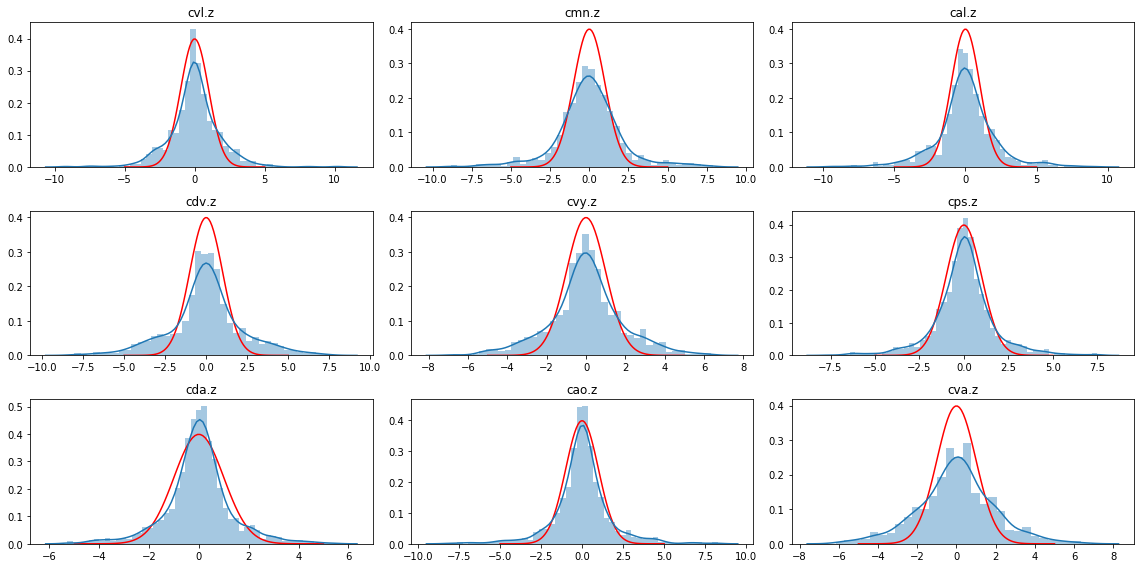

In [26]:
rows = 3
cols = 3
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16, 8))
i = 0

for n, evts in evts_sax.items():
    row = i // rows
    col = i % cols
    axs[row][col].set_title(n)
    axs[row][col].plot(x, pdf, "r")
    o = obs[n]
    o.normalise()
    for evt in evts:
        det = SaxDetect(o.stream[0].data, o.stats.sampling_rate)
        s = det.slice(evt[0], evt[1])
#         s.plot(ax=axs[row][col])
        sns.distplot(s, ax=axs[row][col])
#     if row != rows - 1:
#     axs[row][col].set_xticklabels([])
    i += 1
fig.tight_layout()

In [17]:
evts_stalta = {}
for f, o in obs.items():
    o.bandpass(*bandpass)
    det = StaLtaDetect(o.stream[0].data, o.stats.sampling_rate)
    evts_stalta[f] = [i for i in det.detect(short=50, long=5000, nstds=3, trigger_len=5000)]
evts_stalta

{'cal.z': [(11225.043175358458, 25543.84258399794)],
 'cao.z': [(12782.09812171371, 36351.63574105205)],
 'cda.z': [],
 'cdv.z': [(10176.829714740215, 25218.184033126254)],
 'cmn.z': [(11652.470023377546, 22877.513198736004)],
 'cps.z': [],
 'cva.z': [(11540.524896515404, 23874.842510780545)],
 'cvl.z': [(12731.21397314001, 20323.12894033621)],
 'cvy.z': [(13056.872524011696, 22612.915626152757)]}

In [28]:
# o = ObservationDAO("../sample/2011.240.00.00.00.0000.YW.NAB1..HHZ.D.SAC")


86400000.0